## Programmatically Read Ground Truth Data

In [1]:
import requests
import yaml
from random import random, randint

import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from shapely.geometry import Polygon

In [2]:
with open('./config.yml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [3]:
def open_geojson(url):
    headers = {'cookie': f'_oauth2_proxy={config["AUTH_TOKEN"]}'}
    res = requests.get(url, headers=headers, params={'limit':500})
    gdf = gpd.read_file(res.text)
    return gdf

## Open GT Collection using GeoPandas

Open source Geospatial data frames library

https://geopandas.readthedocs.io/en/latest/

Allows for easy indexing, manipulation, grouping of data. Assists data subsetting and validation.

In [4]:
geojson_url = '[INSERT LINK HERE]'
gdf = open_geojson(geojson_url)

In [5]:
gdf

,Id,Nvx1,Nvx2,Nvx3,id,upload_id,attribute_id,upload_name,geometry
0,1,AGR,FOI,FOI1,1282,22,0,SE_AGR,"POLYGON ((-73.23565 45.49244, -73.23561 45.492..."
1,0,AGR,FOI,FOI1,1283,22,1,SE_AGR,"POLYGON ((-73.26455 45.47713, -73.26448 45.477..."
2,2,AGR,FOI,FOI1,1284,22,2,SE_AGR,"POLYGON ((-73.14833 45.42648, -73.14280 45.426..."
3,3,AGR,FOI,FOI1,1285,22,3,SE_AGR,"POLYGON ((-73.08542 45.37113, -73.08361 45.369..."
4,4,AGR,FOI,FOI1,1286,22,4,SE_AGR,"POLYGON ((-73.17751 45.22490, -73.17699 45.224..."
...,...,...,...,...,...,...,...,...,...
478,0,AGR,BLE,BLE7,1760,22,478,SE_AGR,"POLYGON ((-73.95777 45.57473, -73.95602 45.574..."
479,0,AGR,BLE,BLE7,1761,22,479,SE_AGR,"POLYGON ((-73.98898 45.58700, -73.98683 45.586..."
480,0,AGR,BLE,BLE7,1762,22,480,SE_AGR,"POLYGON ((-73.21937 45.49372, -73.20976 45.493..."
481,0,AGR,BLE,BLE7,1763,22,481,SE_AGR,"POLYGON ((-73.13672 45.38902, -73.13005 45.390..."


## Example filter

`Nvx1 == AGR and Nvx3 == FOI1`

In [6]:
relevant_data = gdf[(gdf['Nvx1'] == 'AGR') & (gdf['Nvx3'] == 'FOI1')]
relevant_data

,Id,Nvx1,Nvx2,Nvx3,id,upload_id,attribute_id,upload_name,geometry
0,1,AGR,FOI,FOI1,1282,22,0,SE_AGR,"POLYGON ((-73.23565 45.49244, -73.23561 45.492..."
1,0,AGR,FOI,FOI1,1283,22,1,SE_AGR,"POLYGON ((-73.26455 45.47713, -73.26448 45.477..."
2,2,AGR,FOI,FOI1,1284,22,2,SE_AGR,"POLYGON ((-73.14833 45.42648, -73.14280 45.426..."
3,3,AGR,FOI,FOI1,1285,22,3,SE_AGR,"POLYGON ((-73.08542 45.37113, -73.08361 45.369..."
4,4,AGR,FOI,FOI1,1286,22,4,SE_AGR,"POLYGON ((-73.17751 45.22490, -73.17699 45.224..."
5,5,AGR,FOI,FOI1,1287,22,5,SE_AGR,"POLYGON ((-73.65168 45.05087, -73.65084 45.050..."
6,6,AGR,FOI,FOI1,1288,22,6,SE_AGR,"POLYGON ((-73.82663 45.03836, -73.82454 45.038..."
7,7,AGR,FOI,FOI1,1289,22,7,SE_AGR,"POLYGON ((-74.02452 45.20584, -74.02444 45.205..."
8,8,AGR,FOI,FOI1,1290,22,8,SE_AGR,"POLYGON ((-73.90605 45.60349, -73.90519 45.603..."
9,9,AGR,FOI,FOI1,1291,22,9,SE_AGR,"POLYGON ((-73.21586 45.63266, -73.21574 45.632..."


## Example usage of data

- Data comparison
- Plot filtered items

### Compare synthetic data set with ground truth

Example workflow for data validation

In [8]:
def create_synthetic_polygon(ll_lat, ll_lon, ul_lat, ul_lon):
    return Polygon(((ll_lon, ll_lat), (ll_lon, ul_lat), (ul_lon, ul_lat), (ul_lon, ll_lat)))

In [9]:
## generate synthetic data

nvx3_values = gdf['Nvx3'].unique()
lat_max = 46.5
lat_min = 46.0
lon_max = -75.0
lon_min = -73.0


synthetic_data = []
for i in range(500):
    m = randint(0, len(nvx3_values)-1)
    nvx3 = nvx3_values[m]
    ll_lat = lat_min + (lat_max - lat_min) * random()
    ll_lon = lon_min + (lon_max - lon_min) * random()
    ul_lat = ll_lat + 0.05
    ul_lon = ll_lon + 0.05
    geom = create_synthetic_polygon(ll_lat, ll_lon, ul_lat, ul_lon)
    synthetic_data.append({'syn_id': i, 'Nvx3': nvx3, 'geometry': geom})

syn_df = gpd.GeoDataFrame(synthetic_data, crs='epsg:4326')
syn_df.head()

,syn_id,Nvx3,geometry
0,0,BLE6,"POLYGON ((-74.89970 46.26419, -74.89970 46.314..."
1,1,ORG7,"POLYGON ((-74.41225 46.36516, -74.41225 46.415..."
2,2,SOY9,"POLYGON ((-73.61831 46.38339, -73.61831 46.433..."
3,3,ORG6,"POLYGON ((-73.41208 46.16732, -73.41208 46.217..."
4,4,BLE4,"POLYGON ((-73.20535 46.24652, -73.20535 46.296..."


In [10]:
## intersect GT data with synthetic data
intersected_points = gpd.overlay(syn_df, gdf, how='intersection')
intersected_points

,syn_id,Nvx3_1,Id,Nvx1,Nvx2,Nvx3_2,id,upload_id,attribute_id,upload_name,geometry
0,3,ORG6,14,AGR,FOI,FOI1,1296,22,14,SE_AGR,"POLYGON ((-73.38065 46.17931, -73.37946 46.180..."
1,391,MIX2,14,AGR,FOI,FOI1,1296,22,14,SE_AGR,"POLYGON ((-73.38065 46.17931, -73.37946 46.180..."
2,9,FOI3,0,AGR,AVO,AVO1,1687,22,405,SE_AGR,"POLYGON ((-73.52243 46.11677, -73.52238 46.116..."
3,398,BLE7,0,AGR,AVO,AVO1,1687,22,405,SE_AGR,"POLYGON ((-73.52243 46.11677, -73.52238 46.116..."
4,468,BLE5,0,AGR,AVO,AVO1,1687,22,405,SE_AGR,"POLYGON ((-73.52243 46.11677, -73.52238 46.116..."
...,...,...,...,...,...,...,...,...,...,...,...
140,361,PFR5,0,AGR,MAH,MAH9,1505,22,223,SE_AGR,"POLYGON ((-73.44471 46.13648, -73.44460 46.136..."
141,398,BLE7,0,AGR,MAI,MAI2,1372,22,90,SE_AGR,"POLYGON ((-73.51240 46.10106, -73.51240 46.100..."
142,468,BLE5,0,AGR,SOY,SOY4,1623,22,341,SE_AGR,"POLYGON ((-73.52036 46.12637, -73.52024 46.126..."
143,468,BLE5,0,AGR,AVO,AVO7,1688,22,406,SE_AGR,"POLYGON ((-73.54580 46.13052, -73.54574 46.130..."


In [11]:
# identify points that match with ground truth
intersected_points[intersected_points['Nvx3_1'] == intersected_points['Nvx3_2']]

,syn_id,Nvx3_1,Id,Nvx1,Nvx2,Nvx3_2,id,upload_id,attribute_id,upload_name,geometry
62,373,SOY3,0,AGR,SOY,SOY3,1619,22,337,SE_AGR,"POLYGON ((-73.14195 46.16689, -73.14187 46.166..."


In [12]:
## identify points that do not match with ground truth
intersected_points[intersected_points['Nvx3_1'] != intersected_points['Nvx3_2']]

,syn_id,Nvx3_1,Id,Nvx1,Nvx2,Nvx3_2,id,upload_id,attribute_id,upload_name,geometry
0,3,ORG6,14,AGR,FOI,FOI1,1296,22,14,SE_AGR,"POLYGON ((-73.38065 46.17931, -73.37946 46.180..."
1,391,MIX2,14,AGR,FOI,FOI1,1296,22,14,SE_AGR,"POLYGON ((-73.38065 46.17931, -73.37946 46.180..."
2,9,FOI3,0,AGR,AVO,AVO1,1687,22,405,SE_AGR,"POLYGON ((-73.52243 46.11677, -73.52238 46.116..."
3,398,BLE7,0,AGR,AVO,AVO1,1687,22,405,SE_AGR,"POLYGON ((-73.52243 46.11677, -73.52238 46.116..."
4,468,BLE5,0,AGR,AVO,AVO1,1687,22,405,SE_AGR,"POLYGON ((-73.52243 46.11677, -73.52238 46.116..."
...,...,...,...,...,...,...,...,...,...,...,...
140,361,PFR5,0,AGR,MAH,MAH9,1505,22,223,SE_AGR,"POLYGON ((-73.44471 46.13648, -73.44460 46.136..."
141,398,BLE7,0,AGR,MAI,MAI2,1372,22,90,SE_AGR,"POLYGON ((-73.51240 46.10106, -73.51240 46.100..."
142,468,BLE5,0,AGR,SOY,SOY4,1623,22,341,SE_AGR,"POLYGON ((-73.52036 46.12637, -73.52024 46.126..."
143,468,BLE5,0,AGR,AVO,AVO7,1688,22,406,SE_AGR,"POLYGON ((-73.54580 46.13052, -73.54574 46.130..."


### Plot relevant points

Example workflow for publishing data

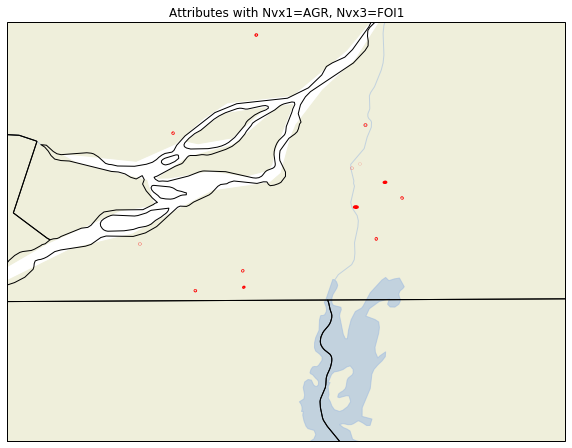

In [13]:
# https://spatialreference.org/ref/epsg/32662/
plate_carree_epsg = 32662
proj = ccrs.epsg(plate_carree_epsg)
relevant_data_epsg = relevant_data.to_crs(epsg=plate_carree_epsg)

fig, ax = plt.subplots(1,1, subplot_kw={'projection': proj}, figsize=(10, 10))
ax.set_extent([-74.5, -72.5, 46, 44.5], crs=ccrs.PlateCarree())
#ax.set_extent([-77, -69, 48, 42], crs=proj)
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none'))
ax.add_feature(cfeature.LAKES.with_scale('10m'), alpha=0.5)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), alpha=0.5)
ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.add_geometries(relevant_data_epsg['geometry'], crs=proj, edgecolor='red', linewidth=3)
ax.set_title('Attributes with Nvx1=AGR, Nvx3=FOI1')
fig.show()